# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

642

## Perform API Calls

In [3]:
# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2e7be3fbf6a6ca5ee22f83c7998246c"

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | grand gaube
Processing Record 3 of Set 1 | mayfield
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | kudahuvadhoo
Processing Record 6 of Set 1 | bekovo
Processing Record 7 of Set 1 | pokrovsk
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | srednekolymsk
Processing Record 10 of Set 1 | isangel
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | hirara
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | ancud
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | qazvin
Processing Record 20 of Set 1 | corinto
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | longyearbyen
Proc

Processing Record 36 of Set 4 | hithadhoo
Processing Record 37 of Set 4 | amboasary
Processing Record 38 of Set 4 | tuatapere
Processing Record 39 of Set 4 | deyang
Processing Record 40 of Set 4 | los llanos de aridane
Processing Record 41 of Set 4 | tutoia
Processing Record 42 of Set 4 | marsa matruh
Processing Record 43 of Set 4 | half moon bay
Processing Record 44 of Set 4 | port-gentil
Processing Record 45 of Set 4 | constitucion
Processing Record 46 of Set 4 | khani
Processing Record 47 of Set 4 | sistranda
Processing Record 48 of Set 4 | san patricio
Processing Record 49 of Set 4 | margate
Processing Record 0 of Set 5 | morgan city
Processing Record 1 of Set 5 | carnarvon
Processing Record 2 of Set 5 | saint anthony
Processing Record 3 of Set 5 | palembang
Processing Record 4 of Set 5 | scottsbluff
Processing Record 5 of Set 5 | mana
Processing Record 6 of Set 5 | jalu
Processing Record 7 of Set 5 | ust-kuyga
Processing Record 8 of Set 5 | kuvshinovo
Processing Record 9 of Set 5 

Processing Record 27 of Set 8 | asfi
Processing Record 28 of Set 8 | maltahohe
Processing Record 29 of Set 8 | faya
Processing Record 30 of Set 8 | balkanabat
Processing Record 31 of Set 8 | karamay
City not found. Skipping...
Processing Record 32 of Set 8 | beira
Processing Record 33 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 34 of Set 8 | bengkulu
Processing Record 35 of Set 8 | auki
Processing Record 36 of Set 8 | beringovskiy
Processing Record 37 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 38 of Set 8 | kungurtug
Processing Record 39 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 40 of Set 8 | juneau
Processing Record 41 of Set 8 | tsiroanomandidy
Processing Record 42 of Set 8 | igarka
Processing Record 43 of Set 8 | norman wells
Processing Record 44 of Set 8 | shimoda
Processing Record 45 of Set 8 | nantucket
Processing Record 46 of Set 8 | znamenskoye
Processing Record 47 of Set 8 | alice springs


Processing Record 14 of Set 12 | kununurra
Processing Record 15 of Set 12 | ipixuna
Processing Record 16 of Set 12 | lusambo
Processing Record 17 of Set 12 | palmer
Processing Record 18 of Set 12 | awbari
Processing Record 19 of Set 12 | kuito
Processing Record 20 of Set 12 | shache
Processing Record 21 of Set 12 | yuci
Processing Record 22 of Set 12 | freeport
Processing Record 23 of Set 12 | ust-koksa
Processing Record 24 of Set 12 | xuanzhou
Processing Record 25 of Set 12 | carauari
Processing Record 26 of Set 12 | kirakira
Processing Record 27 of Set 12 | altamira
Processing Record 28 of Set 12 | lucapa
Processing Record 29 of Set 12 | iguape
Processing Record 30 of Set 12 | alofi
Processing Record 31 of Set 12 | snezhnogorsk
Processing Record 32 of Set 12 | huanuco
Processing Record 33 of Set 12 | majene
Processing Record 34 of Set 12 | san borja
Processing Record 35 of Set 12 | benjamin hill
Processing Record 36 of Set 12 | alotau
City not found. Skipping...
Processing Record 37 

In [4]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Show Record Count
city_data_pd.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [26]:
city_data_pd.to_html('showdata1.html')

In [5]:
# Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.12,-134.97,75.40,82,8,13.56,PF,1605431061
1,grand gaube,-20.01,57.66,80.01,59,31,8.99,MU,1605431061
2,mayfield,36.74,-88.64,69.01,77,90,17.22,US,1605431061
3,port alfred,-33.59,26.89,67.66,80,83,13.06,ZA,1605431061
4,kudahuvadhoo,2.67,72.89,82.90,75,100,12.77,MV,1605431061


In [28]:
#Rearrange columns
city_data_pd = city_data_pd[['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed']]

In [29]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,8,PF,1605431061,82,-23.12,-134.97,75.40,13.56
1,grand gaube,31,MU,1605431061,59,-20.01,57.66,80.01,8.99
2,mayfield,90,US,1605431061,77,36.74,-88.64,69.01,17.22
3,port alfred,83,ZA,1605431061,80,-33.59,26.89,67.66,13.06
4,kudahuvadhoo,100,MV,1605431061,75,2.67,72.89,82.90,12.77


In [30]:
city_data_pd.to_csv('showdata1.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,5.940000e+02
mean,18.325673,16.640993,58.654680,72.313131,52.232323,8.086145,1.605431e+09
std,33.083081,88.491814,25.063052,21.083139,39.521803,5.801213,6.987903e+01
min,-54.800000,-179.170000,-26.500000,15.000000,0.000000,0.270000,1.605431e+09
25%,-9.087500,-63.707500,42.585000,59.000000,3.250000,3.890000,1.605431e+09
50%,20.790000,20.150000,66.045000,78.000000,63.000000,6.930000,1.605431e+09
75%,47.370000,96.932500,78.737500,89.000000,90.000000,10.935000,1.605431e+09
max,78.220000,179.320000,99.030000,100.000000,100.000000,40.260000,1.605431e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index
                                  
dirty_city_data

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.12,-134.97,75.40,82,8,13.56,PF,1605431061
1,grand gaube,-20.01,57.66,80.01,59,31,8.99,MU,1605431061
2,mayfield,36.74,-88.64,69.01,77,90,17.22,US,1605431061
3,port alfred,-33.59,26.89,67.66,80,83,13.06,ZA,1605431061
4,kudahuvadhoo,2.67,72.89,82.90,75,100,12.77,MV,1605431061


In [9]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

## Latitude vs. Temperature Plot

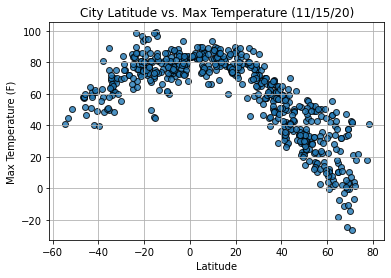

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

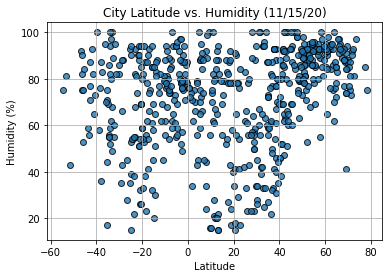

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

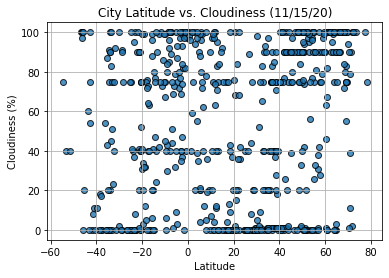

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

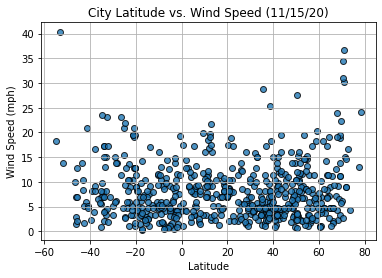

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [14]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

###  Max Temp vs. Latitude Linear Regression

The r-value is: 0.7728488041385934


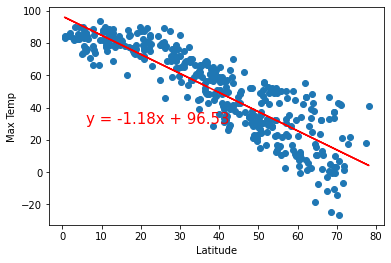

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The r-value is: 0.3658320246927155


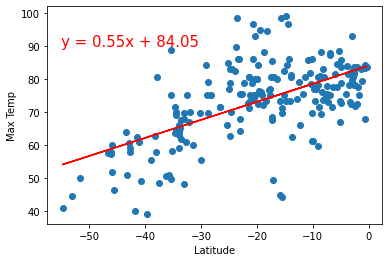

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

The high r value indicates a strong positive correlation between latitude and max temperature. R values ~ 0.5 indicate that there is a moderate positive correlation. 

### Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.17221210845099966


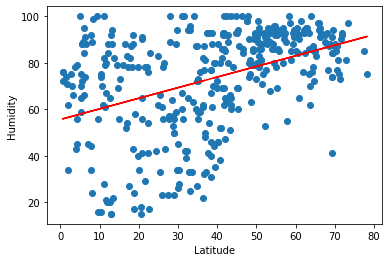

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-value is: 0.01072706424188384


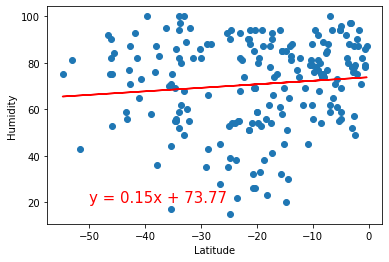

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

The low r values indicate a weak to no relationship between humidity and latitude.

### Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05866679664025835


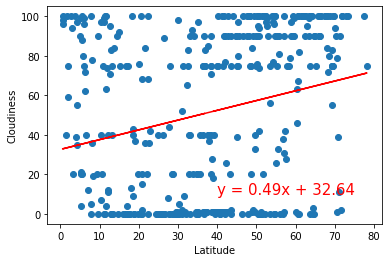

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-value is: 0.0678120243608494


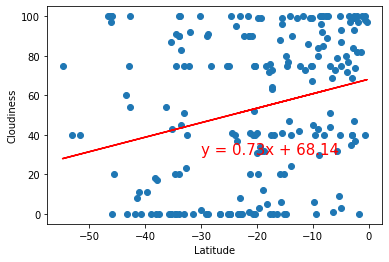

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

The low r values indicate a weak positive relationship between latitude and cloudiness.

### Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.00972038896974728


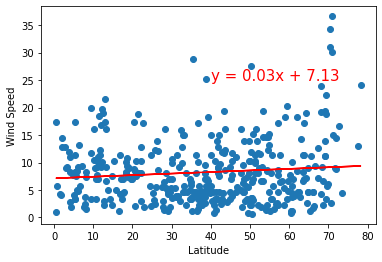

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

The r-value is: 0.06765172241454712


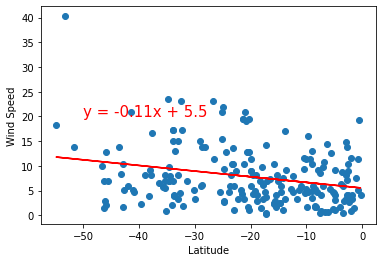

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))

The low r values indicate that there is no real relationship between wind speed and latitude." The difference between the hemispheres doesn't seem to be significant enough to comment upon.